In [1]:
file_path = "/Users/lfinkbeiner/Documents/GitHub/HERA/flux/"
beam_origin = "ant.h5"

In [2]:
%matplotlib notebook
from RIMEz import beam_models
import numpy as np

In [5]:
spline_beam_func = beam_models.model_data_to_spline_beam_func(
    file_path + beam_origin,
    np.array([150e6, 151e6, 152e6])
)

//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [6]:
'''WE DO NOT WANT TO MULTIPLY BY THIS YET. WE CARE ABOUT J x J'''
S = .5 * np.array([
        [1, 1, 0, 0],
        [0, 0, 1, 1j],
        [0, 0, 1, -1j],
        [1, -1, 0, 0]
    ])
def A_matrix(freq, alt, az):
    ''' The recommendation is to put healpy ortho representation here
    This helps with interpolation? I don't know, recheck the Slack '''
    J = spline_beam_func(freq, alt, az)
    J_outer = np.kron(J, np.conj(J))
    return np.dot(S, np.dot(J_outer, np.linalg.inv(S)))

In [7]:
import healpy as hp
#nside = 16, 32, 64, 128...
nside = 128

theta, phi = hp.pix2ang(nside,np.arange(12 * nside * nside))
az = phi
alt = np.pi/2 - theta
J = spline_beam_func(150e6, alt, az)

<IPython.core.display.Javascript object>


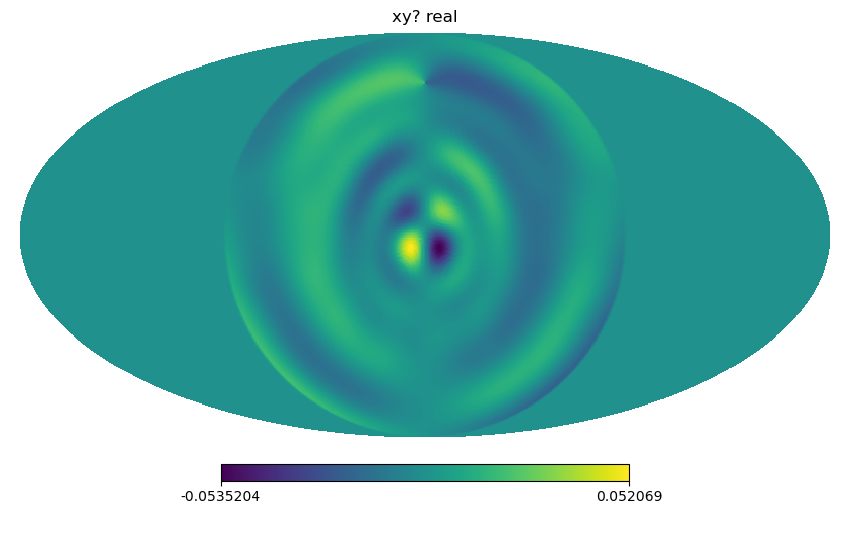

In [8]:
# It is possible that I assigned the indices to the wrong titles
hp.mollview(np.real(J[:, 0, 0]), rot=[0, 90], title='xy? real')

In [ ]:
hp.mollview(np.real(J[:, 1, 0]), rot=[0, 90], title='xx? real')

In [ ]:
hp.mollview(np.real(J[:, 0, 1]), rot=[0, 90], title='yy? real')

In [ ]:
hp.mollview(np.real(J[:, 1, 1]), rot=[0, 90], title='yx? real')

In [ ]:
hp.mollview(np.imag(J[:, 0, 0]), rot=[0, 90], title='xy? imaginary')

In [ ]:
hp.mollview(np.imag(J[:, 1, 0]), rot=[0, 90], title='xx? imaginary')

In [ ]:
hp.mollview(np.imag(J[:, 0, 1]), rot=[0, 90], title='yy? imaginary')

In [ ]:
hp.mollview(np.imag(J[:, 1, 1]), rot=[0, 90], title='yx? imaginary')

In [ ]:
hp.orthview(np.abs(J[:, 1, 0]), rot=[0, 90], half_sky=True, title='xx? magnitude')

In [ ]:
hp.orthview(np.abs(J[:, 0, 1]), rot=[0, 90], half_sky=True, title='yy? magnitude')

In [ ]:
hp.orthview(np.abs(J[:, 1, 1]), rot=[0, 90], half_sky=True, title='yx? magnitude')